<a href="https://colab.research.google.com/github/Siripurapu-VighnaChaitanya/ML_practice_files/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [51]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [52]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [53]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [54]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
dataset['v1']=dataset['v1'].map({'ham':0,'spam':1})

In [56]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: ylabel='count'>

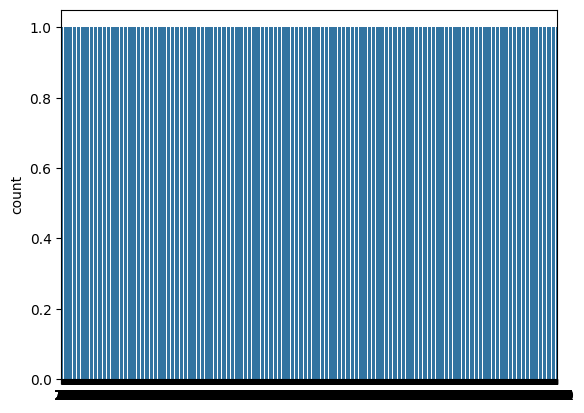

In [57]:
sb.countplot(dataset['v1'])

In [58]:
dataset.isna().sum()

,0
v1,0
v2,0


In [63]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [64]:
corpus=[]
print(corpus)

[]


In [67]:
dataset['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [66]:
for i in range(len(dataset)):
  message=re.sub(r'[^a-zA-Z]',' ',dataset['v2'][i])
  message=message.lower()
  message=message.split()
  snb=SnowballStemmer(language='english')
  message= [snb.stem(word) for word in message if word not in str(stopwords.words('english'))]
  message=' '.join(message)
  corpus.append(message)

In [77]:
len(corpus)

5572

In [199]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,0].values

In [196]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
x.shape

(5572, 6103)

In [86]:
y.shape

(5572,)

In [200]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [91]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [95]:
x_train.shape

(4457, 6103)

In [96]:
x_test.shape

(1115, 6103)

In [202]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)

MultinomialNB()

In [98]:
y_pred=classifier.predict(x_test)

In [99]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.9811659192825112

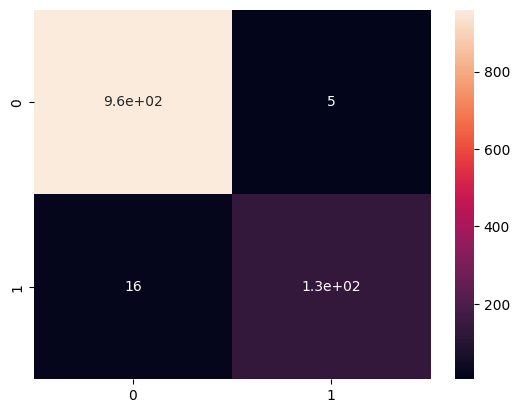

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=(confusion_matrix(y_pred,y_test))
sb.heatmap(cm,annot=True)
accuracy_score(y_pred,y_test)

In [186]:
tex='i have free money press here to get prize of $200 dollers worth '
text1='you won the game click here to withdraw money of 10 crore worth prize-money good luck click fast to withdraw money'

In [187]:
tex

'i have free money press here to get prize of $200 dollers worth '

In [188]:
text=np.array(tex).reshape(1,)
text11=np.array(text1).reshape(1,)
text11

array(['you won the game click here to withdraw money of 10 crore worth prize-money good luck click fast to withdraw money'],
      dtype='<U114')

In [189]:
random_pred=cv.transform(text)
random_pred2=cv.transform(text11)

In [190]:
print(random_pred.shape)
print(random_pred2.shape)

(1, 6103)
(1, 6103)


In [191]:
print(classifier.predict(random_pred))
print(classifier.predict(random_pred2))

[1]
[1]
